# The Heart Failure Prediction Dataset
The Dataset about heart patients of an Institute of Cardiology.
https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital

# Context
Heart disease is easier to treat when detected early, heart disease is the leading cause of death in the all over the world. The term “heart disease” refers to several types of heart conditions. In the Pakistan and some other countries, the most common type of heart disease is coronary artery disease (CAD), which can lead to heart attack. You can greatly reduce your risk for heart disease through lifestyle changes.
I have uploaded this dataset together to call my fellow data scientists to run their NLP algorithms and Kernels to find and explore the heart failure predictions etc. by them selves.

## Content
The data contains complete history of heart patients (so data scientists from different parts of the world can work with it). The dataset is collected from Pakistan, Faisalabad hospital named institute of cardiology.

## About this dataset

- Age : Age of the patient
- Age Group: Such as 21-30 and 31-40 are grouped
- Gender : Sex of the patient
- Locality: Rural or Urban
- Marital status: Married or unmarried
- Smoking: yes/no
- Depression: yes/no
- Mortality: Died= 0 and Alive= 1
- Follow.Up: Number of visiting time
- cp : Chest Pain type chest pain type
- Diabetes: 0 means yes and 1 means no
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- trestbps : resting blood pressure (in mm Hg)
- rest_ecg : resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- PLATELET_COUNT
- Hemoglobin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set_style('whitegrid')


In [2]:
HA = pd.read_csv('FIC.Full CSV.csv')
HA

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


In [3]:
#Viewing  the heart attack column
HA.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [4]:
#viewing the data types, if nvalues or alphabets
HA.dtypes

Age                                                                                           int64
Age.Group                                                                                    object
Gender                                                                                       object
Locality                                                                                     object
Marital status                                                                               object
Life.Style                                                                                   object
Sleep                                                                                        object
Category                                                                                     object
Depression                                                                                   object
Hyperlipi                                                                                    object


In [5]:
#viewing the completeness of the data
HA.isnull().sum()
#it looks all good

Age                                                                                         0
Age.Group                                                                                   0
Gender                                                                                      0
Locality                                                                                    0
Marital status                                                                              0
Life.Style                                                                                  0
Sleep                                                                                       0
Category                                                                                    0
Depression                                                                                  0
Hyperlipi                                                                                   0
Smoking                                                     

<AxesSubplot:>

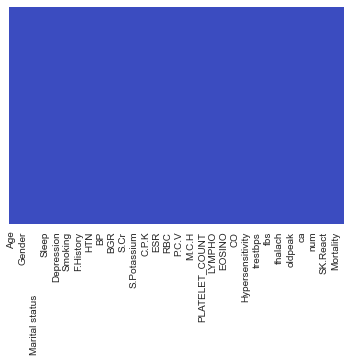

In [6]:
## visual representaion of viewing the completeness of the data
sns.heatmap(HA.isnull(),yticklabels = False,cbar = False,cmap = 'coolwarm')

# EDA

# The Target is the mortality rate

In [7]:
HA.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [8]:
HA['Mortality'].value_counts()
#remember 0 is died and 1 is alive 
#our model should be predicting more dead people as it contained more dead poeple

0    288
1     80
Name: Mortality, dtype: int64

In [9]:
HA.dtypes

Age                                                                                           int64
Age.Group                                                                                    object
Gender                                                                                       object
Locality                                                                                     object
Marital status                                                                               object
Life.Style                                                                                   object
Sleep                                                                                        object
Category                                                                                     object
Depression                                                                                   object
Hyperlipi                                                                                    object


In [10]:
HA.corr()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
Age,1.000000,-0.165327,0.231081,-0.034220,0.101008,-0.073223,0.019354,-0.012162,0.020679,0.063956,...,-0.160281,0.103862,0.147343,0.438851,-0.261194,0.117005,-0.076990,-0.288514,-0.099490,0.172255
F.History,-0.165327,1.000000,-0.058543,0.091555,-0.090549,0.043054,-0.169806,-0.105735,-0.099815,-0.211563,...,0.006904,-0.117903,-0.080862,0.005318,0.032143,-0.023562,0.063495,0.271048,-0.127081,0.068126
Diabetes,0.231081,-0.058543,1.000000,0.013709,-0.170121,-0.239477,0.220138,0.211144,0.029119,0.086394,...,-0.028842,-0.039453,0.085054,0.050180,-0.090673,-0.010611,0.119293,-0.426921,0.317722,-0.048281
BP,-0.034220,0.091555,0.013709,1.000000,-0.116225,0.084895,-0.032729,-0.044125,-0.177179,0.174460,...,0.025394,-0.161551,-0.130320,-0.077802,-0.082335,-0.062612,0.002171,0.116646,-0.041203,0.158229
Thrombolysis,0.101008,-0.090549,-0.170121,-0.116225,1.000000,-0.014503,-0.018159,-0.044157,0.134328,0.088032,...,-0.177338,-0.079647,-0.084403,-0.118623,-0.055372,-0.021147,-0.701222,0.106768,-0.096764,0.201706
BGR,-0.073223,0.043054,-0.239477,0.084895,-0.014503,1.000000,-0.182553,-0.191250,0.104572,-0.118751,...,0.026796,0.044553,0.000053,-0.048990,0.172845,-0.026557,-0.065698,0.332733,-0.113078,0.230562
B.Urea,0.019354,-0.169806,0.220138,-0.032729,-0.018159,-0.182553,1.000000,0.958810,-0.189550,0.461917,...,0.098115,-0.104570,-0.015368,-0.070728,0.029729,0.032640,0.030243,-0.025275,0.069328,-0.176444
S.Cr,-0.012162,-0.105735,0.211144,-0.044125,-0.044157,-0.191250,0.958810,1.000000,-0.225766,0.368047,...,0.105837,-0.107096,0.027721,-0.073509,0.050594,0.069217,0.039894,0.032497,0.082850,-0.156134
S.Sodium,0.020679,-0.099815,0.029119,-0.177179,0.134328,0.104572,-0.189550,-0.225766,1.000000,-0.149939,...,0.005462,0.059878,-0.096929,-0.037350,0.010334,-0.013756,0.032199,-0.072487,-0.021864,0.083227
S.Potassium,0.063956,-0.211563,0.086394,0.174460,0.088032,-0.118751,0.461917,0.368047,-0.149939,1.000000,...,-0.057632,-0.136824,-0.104765,0.014557,-0.155958,-0.058456,0.101464,-0.239204,0.002179,-0.093369


In [11]:
#Factors that contribute to the Mortality rate
HA.corr()['Mortality'].sort_values(ascending = False)[1:]


Diabetes          0.317722
chol              0.175142
LYMPHO            0.106187
M.C.H             0.095050
M.C.V             0.094364
EOSINO            0.087040
S.Cr              0.082850
M.C.H.C           0.082435
B.Urea            0.069328
SK                0.067853
MONOCYTE          0.046161
PLATELET_COUNT    0.040522
slope             0.030498
thal              0.020061
P.C.V             0.016327
ESR               0.015143
S.Chloride        0.011773
Hemoglobin        0.006626
S.Potassium       0.002179
restecg          -0.012401
S.Sodium         -0.021864
fbs              -0.024669
thalach          -0.039567
cp               -0.040081
BP               -0.041203
CK.MB            -0.059392
RBC              -0.078343
C.P.K            -0.086996
NEUTROPHIL       -0.088878
Thrombolysis     -0.096764
trestbps         -0.098750
Age              -0.099490
exang            -0.106243
oldpeak          -0.110228
BGR              -0.113078
num              -0.114000
F.History        -0.127081
W

<AxesSubplot:>

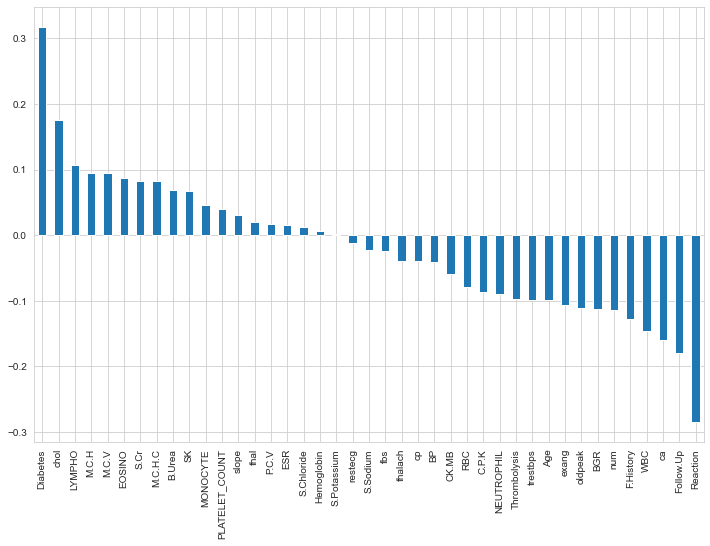

In [12]:
#Factors that contribute to the Mortality rate
plt.figure(figsize = (12,8))
HA.corr()['Mortality'].sort_values(ascending = False)[1:].plot(kind = 'bar')

<AxesSubplot:xlabel='Mortality', ylabel='count'>

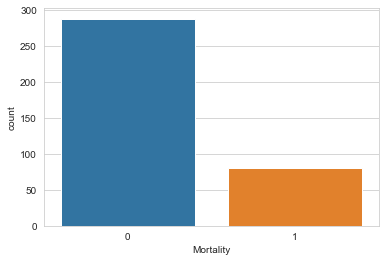

In [13]:
#visual representation of mortality rate
sns.countplot(x = 'Mortality', data = HA)

In [14]:
#viewing the age group classification
HA['Age.Group'].value_counts()
#we have five age group

51-60    184
61-70     91
41-50     61
31-40     20
21-30     12
Name: Age.Group, dtype: int64

<AxesSubplot:xlabel='Age.Group', ylabel='count'>

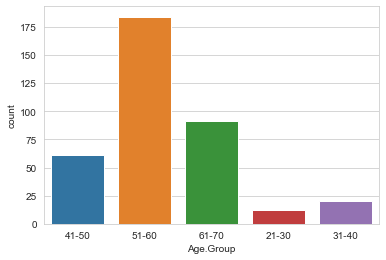

In [15]:
#visualisation of age group classification
sns.countplot(x = 'Age.Group',data = HA)

<AxesSubplot:xlabel='Age.Group', ylabel='count'>

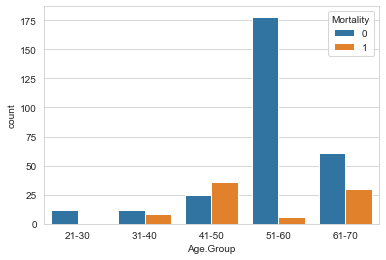

In [16]:
#visualisation of age group classification iwith their survival rate
x = sorted(HA['Age.Group'].unique())
sns.countplot(x = 'Age.Group', hue = 'Mortality' ,data = HA, order = x)

<AxesSubplot:xlabel='Mortality', ylabel='Age'>

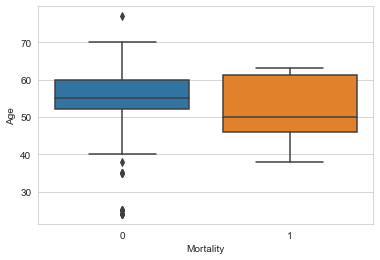

In [17]:
#boxplot showing mean and percetiles
sns.boxplot(x = 'Mortality', y = 'Age', data = HA)

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

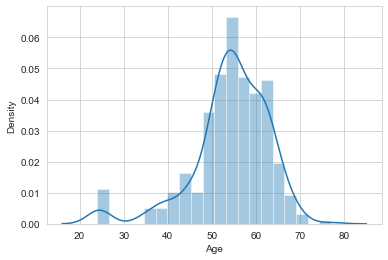

In [18]:
sns.distplot(HA['Age'])
#showing age distribution and 80 seems to be the oldest

<AxesSubplot:xlabel='Gender', ylabel='count'>

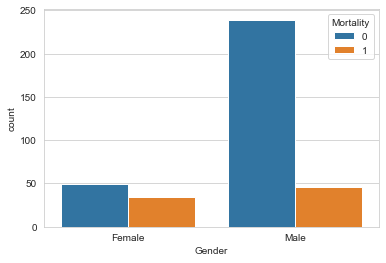

In [19]:
#visualisation of gender distribution
sns.countplot(x = 'Gender',hue = 'Mortality',data = HA)

<AxesSubplot:xlabel='Age.Group', ylabel='count'>

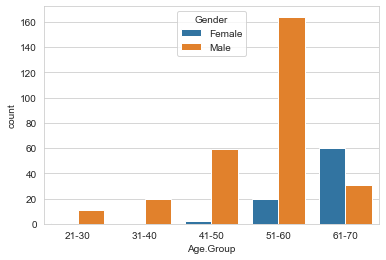

In [20]:
#shows gender distribution with age group, more female at 51-60
x = sorted(HA['Age.Group'].unique())
sns.countplot(x = 'Age.Group',hue = 'Gender', data = HA, order = x)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

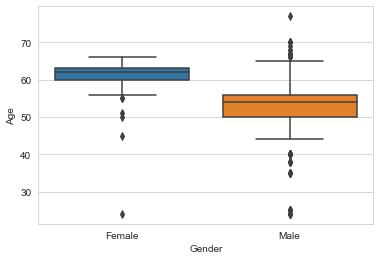

In [21]:
#shows gender distribution with age
sns.boxplot(x = 'Gender', y = 'Age', data = HA)

<AxesSubplot:xlabel='Marital status                       ', ylabel='count'>

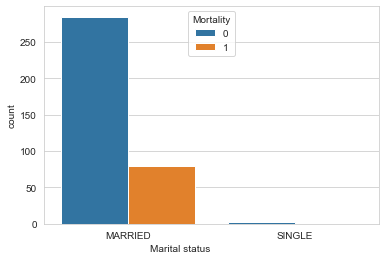

In [22]:
sns.countplot(x = 'Marital status                       ',hue = 'Mortality', data = HA)
#high tendency in married people  than single

<AxesSubplot:xlabel='Sleep', ylabel='count'>

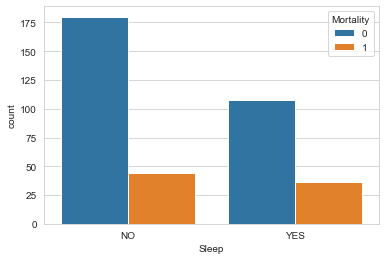

In [23]:
sns.countplot(x = 'Sleep',hue = 'Mortality', data = HA)
#sleep does not play too much factor

<AxesSubplot:xlabel='Smoking', ylabel='count'>

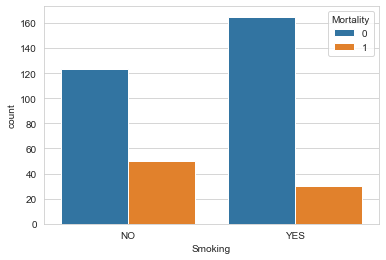

In [24]:
sns.countplot(x = 'Smoking',hue = 'Mortality', data = HA)
#low numbers for people that smoke t to die for Heart attack

<AxesSubplot:xlabel='Depression', ylabel='count'>

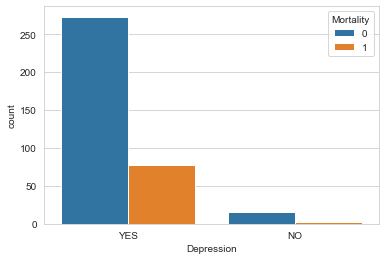

In [25]:
sns.countplot(x = 'Depression',hue = 'Mortality', data = HA)
# a low percentage of depressed people can also get Heart attack and die 

<AxesSubplot:xlabel='Family.History', ylabel='count'>

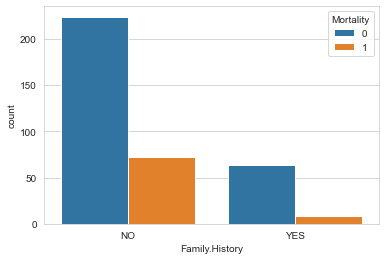

In [26]:
sns.countplot(x = 'Family.History',hue = 'Mortality', data = HA)
#with family history, it's has  death rate than those with no family history

<AxesSubplot:xlabel='F.History', ylabel='count'>

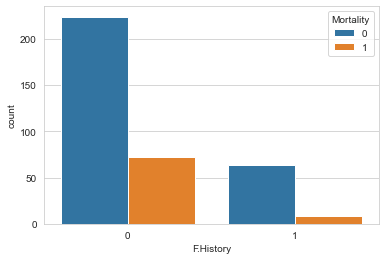

In [27]:
sns.countplot(x = 'F.History',hue = 'Mortality', data = HA)

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

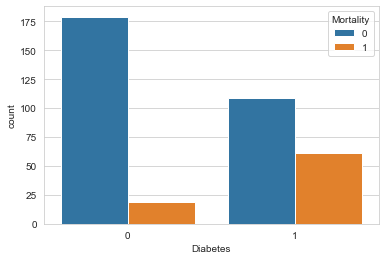

In [28]:
#people with diabetes have higher chance of dying via hEART ATTACK
sns.countplot(x = 'Diabetes',hue = 'Mortality', data = HA)

<AxesSubplot:xlabel='Diabetes', ylabel='Age'>

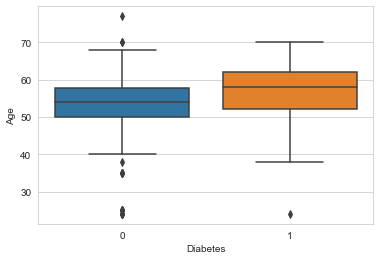

In [29]:
sns.boxplot(x = 'Diabetes', y = 'Age', data = HA)

<AxesSubplot:xlabel='Diabetes', ylabel='Age'>

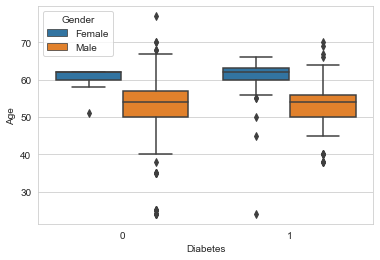

In [30]:
sns.boxplot(x = 'Diabetes', y = 'Age',hue = 'Gender', data = HA)

# DENSITY DISTRIBUTION OF 5 FACTORS THAT STRONGLY CORRELATE WITH THE MORTALITY RATE

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

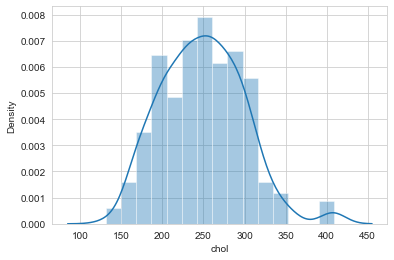

In [31]:
sns.distplot(HA['chol'])
#the distribution of CHOL 

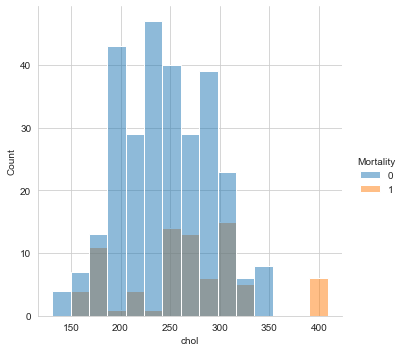

In [32]:
sns.displot(HA,x = 'chol', hue = 'Mortality')

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LYMPHO', ylabel='Density'>

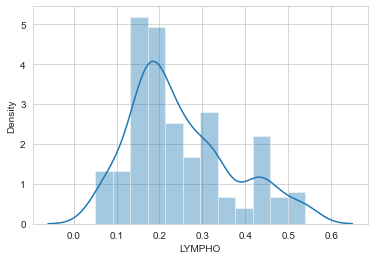

In [33]:
sns.distplot(HA['LYMPHO'])

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='M.C.H', ylabel='Density'>

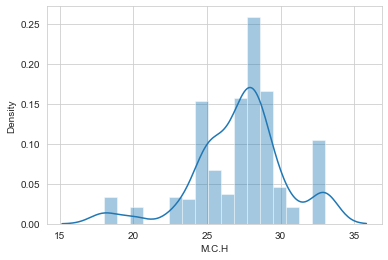

In [34]:
sns.distplot(HA['M.C.H'])

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='M.C.V', ylabel='Density'>

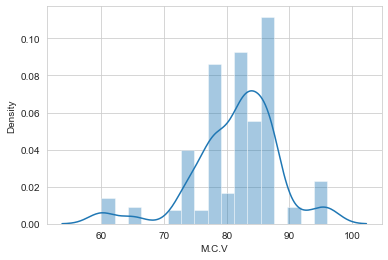

In [35]:
sns.distplot(HA['M.C.V'])

<AxesSubplot:xlabel='M.C.V', ylabel='Density'>

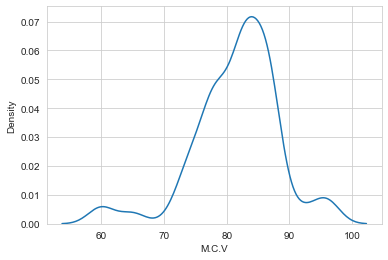

In [36]:
sns.kdeplot(HA['M.C.V'])

<AxesSubplot:xlabel='EOSINO', ylabel='Density'>

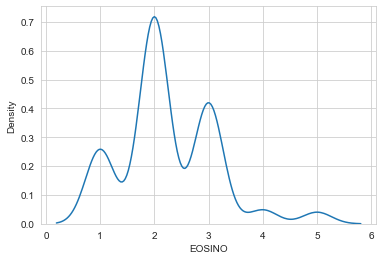

In [37]:
sns.kdeplot(HA['EOSINO'])

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EOSINO', ylabel='Density'>

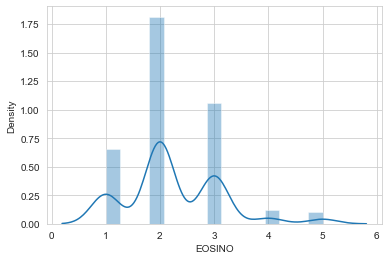

In [38]:
sns.distplot(HA['EOSINO'])

# DATA PREPROCESSING

In [39]:
HA.select_dtypes(['object']).columns

Index(['Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'HTN', 'Allergies', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'SK.React'],
      dtype='object')

In [40]:
HA['CO'].nunique() #type of chest pain

37

In [41]:
HA['Diagnosis'].nunique() #diagnosis

37

In [42]:
#i try to view the correlation btw and decided to drop the CO= Wwhich is the type of chest pain, which can be attributed to the 
HA[['Diagnosis' ,'CO']].value_counts()

Diagnosis                    CO                                           
A/W M.I                      Chest pain,                                      23
AC I/W M.I                   Chest pain, SWEATING                             16
ACS, NSTEMI                  SOB FROM 1 DAY                                   16
I/W M.I                      CENTRAL Chest pain,                              12
A/S WALL M.I                 Chest pain,                                      11
Ac I/P M.Iwith RV Infarct    Chest pain,nausea,vertigo,sweating,headache      10
Inf. Wall M.I                Chest pain, VOMITING                             10
POSTERIOR WALL M.I           Chest pain,SOB                                   10
INF WALL M.I                 Chest pain,                                      10
AC I/W M.I                   Chest pain 1 hr                                  10
M.I ,ACS                     Chest pain,NAUSEA, SWELLOWING                    10
ACUTE I/W M.I                Chest

In [43]:
#takes away CO
HA.drop('CO',axis = 1, inplace = True)

In [44]:
HA['Others '].nunique()

17

In [45]:
HA['Others '].value_counts()
#im taking this out because 201 have no effect or sickness, 53 have HN and i already have a HN column and this should all under be under diagnosis

no                                  201
HTN                                  53
HTN, DM                              19
PND, ORTHOPENIA                      16
IHD, SOB                             10
DM                                   10
ACS                                  10
IHD, HTN                              7
LV dysfunction                        7
HCV, IHD                              6
CHB, RV INFARCT                       6
ORTHOPENIA, PND                       6
ICMP WITH EF= 30%,PULMONAR ODEMA      6
SEIZARIAN, HYSTECTOMY.                5
PULMONARY ODEMA                       2
DM,M.I                                2
IHD,DM                                2
Name: Others , dtype: int64

In [46]:
HA.drop('Others ',axis = 1, inplace = True)

In [47]:
HA.select_dtypes(['object']).columns

Index(['Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'HTN', 'Allergies', 'Diagnosis', 'Hypersensitivity',
       'SK.React'],
      dtype='object')

In [48]:
HA[['Diagnosis','Age.Group','SK.React']]

,Diagnosis,Age.Group,SK.React
0,EXT. ACUTE WALL M.I,41-50,NO
1,A/W M.I,51-60,NO
2,AC I/W M.I (RV) RE. M.I,51-60,NO
3,I/W M.I,51-60,NO
4,A/W M.I,51-60,NO
...,...,...,...
363,"old I/W M.I, ACS.",51-60,BODY.PAIN
364,A LATERAL WALL M.I,51-60,STOMACH.BLEEDING
365,A/W M.I,51-60,COUGH.BLEEDING
366,AC I/W M.I,51-60,COUGH.BLEEDING


# Encoding categorical data

In [49]:
#i encode the diagnosis and age into 0 and 1
NEW = pd.get_dummies(HA[['Diagnosis','Age.Group','SK.React'] ])
NEW

,Diagnosis_A LATERAL WALL M.I,"Diagnosis_A/C, A/W M.I",Diagnosis_A/CI/W M.I,Diagnosis_A/L WALL M.I,Diagnosis_A/S M.I,Diagnosis_A/S WALL M.I,Diagnosis_A/W M.I,Diagnosis_AC I/W M.I,Diagnosis_AC I/W M.I (RV) RE. M.I,Diagnosis_AC. A/L M.I,...,Age.Group_41-50,Age.Group_51-60,Age.Group_61-70,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
364,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
365,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
366,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [50]:
HA.drop(['Diagnosis','Age.Group' ,'SK.React'],axis = 1, inplace = True)


In [51]:
HA= pd.concat([HA,NEW],axis= 1)
HA

,Age,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,...,Age.Group_41-50,Age.Group_51-60,Age.Group_61-70,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,NO,...,1,0,0,0,0,0,0,1,0,0
1,51,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,...,0,1,0,0,0,0,0,1,0,0
2,55,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,...,0,1,0,0,0,0,0,1,0,0
3,55,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,...,0,1,0,0,0,0,0,1,0,0
4,56,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,NO,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,NO,...,0,1,0,1,0,0,0,0,0,0
364,55,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,YES,...,0,1,0,0,0,0,0,0,0,1
365,58,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,...,0,1,0,0,1,0,0,0,0,0
366,58,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,YES,...,0,1,0,0,1,0,0,0,0,0


In [52]:
y = HA['Mortality']
y

0      0
1      0
2      0
3      0
4      0
      ..
363    0
364    0
365    0
366    0
367    0
Name: Mortality, Length: 368, dtype: int64

In [53]:
X =HA.drop('Mortality',axis = 1) 


In [54]:
X

,Age,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,...,Age.Group_41-50,Age.Group_51-60,Age.Group_61-70,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,NO,...,1,0,0,0,0,0,0,1,0,0
1,51,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,...,0,1,0,0,0,0,0,1,0,0
2,55,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,...,0,1,0,0,0,0,0,1,0,0
3,55,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,...,0,1,0,0,0,0,0,1,0,0
4,56,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,NO,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,NO,...,0,1,0,1,0,0,0,0,0,0
364,55,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,YES,...,0,1,0,0,0,0,0,0,0,1
365,58,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,...,0,1,0,0,1,0,0,0,0,0
366,58,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,YES,...,0,1,0,0,1,0,0,0,0,0


In [55]:
X['Locality  '] = X['Locality  '].apply(lambda x: 1 if x == 'RURAL' else 0)
X['Marital status                       ']=X['Marital status                       '].apply(lambda x: 1 if x == 'MARRIED' else 0)
X['Life.Style                                                                              ']= X['Life.Style                                                                              '].apply(lambda x: 1 if x == 'NO' else 0)
X['Category']=X['Category'].apply(lambda x: 1 if x == 'FREE' else 0)
X['Depression']=X['Depression'].apply(lambda x: 1 if x == 'YES' else 0)
X['Hyperlipi'] = X['Hyperlipi'].apply(lambda x: 1 if x == 'YES' else 0)
X['Smoking'] = X['Smoking'].apply(lambda x: 1 if x == 'YES' else 0)
X['Family.History'] = X['Family.History'] .apply(lambda x:1 if x == 'NO' else 0)
X['HTN'] = X['HTN'].apply(lambda x:1 if x == 'NO' else 0 )
X['Allergies'] = X['Allergies'].apply(lambda x:1 if x == 'NO' else 0)
X['Hypersensitivity'] = X['Hypersensitivity'].apply(lambda x:1 if x == 'NO' else 0)
X['Gender'] = X['Gender'] .apply(lambda x: 1 if x == 'Female' else 0)
X['Sleep'] = X['Sleep'] .apply(lambda x: 1 if x == 'NO' else 0)

In [56]:
X

,Age,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,...,Age.Group_41-50,Age.Group_51-60,Age.Group_61-70,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,51,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
2,55,1,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,55,1,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
4,56,1,1,1,0,1,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,0,0,1,1,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
364,55,0,1,1,0,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
365,58,0,0,1,1,1,1,1,1,0,...,0,1,0,0,1,0,0,0,0,0
366,58,0,0,1,1,1,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0


# DATA PROCESSING

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# DECISION TREE CLASSIFIER

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
predictions= classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        91
           1       0.77      0.85      0.81        20

    accuracy                           0.93       111
   macro avg       0.87      0.90      0.88       111
weighted avg       0.93      0.93      0.93       111

[[86  5]
 [ 3 17]]


In [59]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions= logmodel.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        91
           1       0.87      0.65      0.74        20

    accuracy                           0.92       111
   macro avg       0.90      0.81      0.85       111
weighted avg       0.92      0.92      0.91       111

[[89  2]
 [ 7 13]]


# K-NEAREST NEIGHBOUR

In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
predictions= classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        91
           1       0.67      0.50      0.57        20

    accuracy                           0.86       111
   macro avg       0.78      0.72      0.75       111
weighted avg       0.85      0.86      0.86       111

[[86  5]
 [10 10]]


# NAIVE BAYES

In [62]:
from sklearn.naive_bayes import GaussianNB
GNB= GaussianNB()
GNB.fit(X_train, y_train)
predictions= GNB.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        91
           1       0.33      1.00      0.50        20

    accuracy                           0.64       111
   macro avg       0.67      0.78      0.61       111
weighted avg       0.88      0.64      0.68       111

[[51 40]
 [ 0 20]]


# RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)
predictions= RF.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        91
           1       0.94      0.85      0.89        20

    accuracy                           0.96       111
   macro avg       0.96      0.92      0.94       111
weighted avg       0.96      0.96      0.96       111

[[90  1]
 [ 3 17]]


# KERNEL SVM

In [64]:
from sklearn.svm import SVC
SVC= SVC(kernel = 'rbf', random_state = 0)
SVC.fit(X_train, y_train)
predictions= SVC.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        91
           1       0.86      0.60      0.71        20

    accuracy                           0.91       111
   macro avg       0.89      0.79      0.83       111
weighted avg       0.91      0.91      0.90       111

[[89  2]
 [ 8 12]]


# Comment

Model Choice:

Random Forest seems to be your best-performing model overall with high accuracy, precision, and recall.

In [65]:
X_train.shape

(257, 103)

# DEEP LEARNING

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [67]:
model = Sequential()
model.add(Dense(units = 103, activation = 'relu', ))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [68]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/100
9/9 [==============================] - 1s 34ms/step - loss: 0.5753 - accuracy: 0.7237 - val_loss: 0.4678 - val_accuracy: 0.8198
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5211 - accuracy: 0.7665 - val_loss: 0.4449 - val_accuracy: 0.8198
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4881 - accuracy: 0.7665 - val_loss: 0.4263 - val_accuracy: 0.8198
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4443 - accuracy: 0.7704 - val_loss: 0.4193 - val_accuracy: 0.8288
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 0.4174 - accuracy: 0.7860 - val_loss: 0.4039 - val_accuracy: 0.8108
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3941 - accuracy: 0.7899 - val_loss: 0.3861 - val_accuracy: 0.8108
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3738 - accuracy: 0.7938 - val_loss: 0.3758 - val_accuracy: 0.8198
Epoch 8/100
9/9 [===

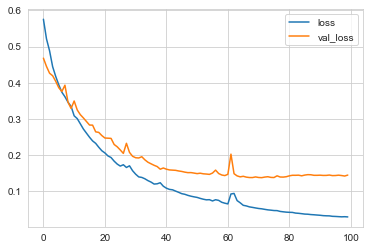

In [70]:
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.legend()

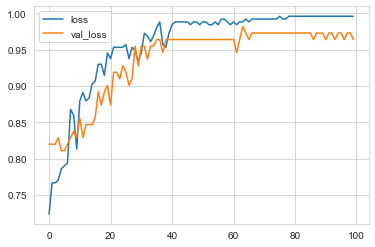

In [71]:
plt.plot(model.history.history['accuracy'], label = 'accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

# Comment

- The learning curve looks good for the training data and low for the test data, 99%  accuracy on the training data and 96% on test data, fine tuning by adding more layers or early cutback or dropping out layers and epoch could be carried out but random forst already does a good work and the dataset is not large

In [73]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        91
           1       0.86      0.95      0.90        20

    accuracy                           0.96       111
   macro avg       0.93      0.96      0.94       111
weighted avg       0.97      0.96      0.96       111

[[88  3]
 [ 1 19]]
